# Customer Segmentation and Performance Marketing Project


Customer Personality Analysis is a detailed analysis of a company’s ideal customers. <br>It helps a business to better understand its customers and makes it easier for them to modify products <br>according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. <br>For example, instead of spending money to market a new product to every customer in the company’s database, <br>a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

(ps: Info above is quoted from:  https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/input)

<h3 style="color:green;">Step 1: Import libraries and load data from Kaggle</h3>


In [1]:
#Import libraries
import numpy as np 
import pandas as pd
import os

#Set display to show all columns
pd.set_option('display.max_columns', None)


In [2]:
#Load Dataset 
import pandas as pd
data_path = 'data/marketing_campaign.csv'
df = pd.read_csv(data_path)
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


Transforme the data into right format

In [3]:
df.shape 

(2240, 1)

In [4]:
df.columns[0]

'ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'

In [5]:
df.iloc[:,0]

0       5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1       2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2       4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3       6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4       5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
                              ...                        
2235    10870\t1967\tGraduation\tMarried\t61223\t0\t1\...
2236    4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...
2237    7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...
2238    8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...
2239    9405\t1954\tPhD\tMarried\t52869\t1\t1\t15-10-2...
Name: ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_

In [6]:
#Split the file to the right format
new_columns = df.columns[0].split('\t')
df_split = df.iloc[:, 0].str.split('\t', expand=True)

# Add the column names
df_split.columns = new_columns

#Let's have a look at the splited data
display(
    df_split.shape,
    df_split.dtypes,
    df_split.isnull().sum(),
    df_split.describe(),
    df_split.head(),
    )

(2240, 29)

ID                     object
Year_Birth             object
Education              object
Marital_Status         object
Income                 object
Kidhome                object
Teenhome               object
Dt_Customer            object
Recency                object
MntWines               object
MntFruits              object
MntMeatProducts        object
MntFishProducts        object
MntSweetProducts       object
MntGoldProds           object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Response               object
dtype: object

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,2240,59,5,8,1975,3,3,663,100,776,158,558,182,177,213,15,15,14,14,16,2,2,2,2,2,2,1,1,2
top,5524,1976,Graduation,Married,,0,0,31-08-2012,56,2,0,7,0,0,1,1,2,0,3,7,0,0,0,0,0,0,3,11,0
freq,1,89,1127,864,24,1293,1158,12,37,42,400,53,384,419,73,970,373,586,490,393,2077,2073,2077,2096,2210,2219,2240,2240,1906


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


<h3 style="color:green;">Step 2: Feature Engineering</h3>


**About the Datase:**

Customer Information

| **Feature**        | **Description**                                               |
|--------------------|---------------------------------------------------------------|
| ID                 | Unique identifier for each customer                           |
| Year_Birth         | Customer's birth year                                         |
| Education          | Customer's education level                                    |
| Marital_Status     | Customer's marital status                                     |
| Income             | Customer's yearly household income                            |
| Kidhome            | Number of children in the customer's household                |
| Teenhome           | Number of teenagers in the customer's household               |
| Dt_Customer        | Date of customer's enrollment with the company                |
| Recency            | Number of days since the customer's last purchase             |
| Complain           | Whether the customer has made a complaint                     |



Products

| **Feature**        | **Description**                                               |
|--------------------|---------------------------------------------------------------|
| MntWines           | Amount spent on wine in the last 2 years                      |
| MntFruits          | Amount spent on fruits in the last 2 years                    |
| MntMeatProducts    | Amount spent on meat products in the last 2 years             |
| MntFishProducts    | Amount spent on fish products in the last 2 years             |
| MntSweetProducts   | Amount spent on sweet products in the last 2 years            |
| MntGoldProds       | Amount spent on gold products in the last 2 years             |



Purchase Channels

| **Feature**        | **Description**                                               |
|--------------------|---------------------------------------------------------------|
| NumWebPurchases    | Number of web purchases made by the customer                  |
| NumCatalogPurchases| Number of catalog purchases made by the customer              |
| NumStorePurchases  | Number of store purchases made by the customer                |
| NumWebVisitsMonth  | Number of web visits made by the customer in a month          |


Promotion

| **Feature**        | **Description**                                               |
|--------------------|---------------------------------------------------------------|
| NumDealsPurchases  | Number of purchases made through promotions                   |
| AcceptedCmp1       | Whether the customer accepted campaign 1                      |
| AcceptedCmp2       | Whether the customer accepted campaign 2                      |
| AcceptedCmp3       | Whether the customer accepted campaign 3                      |
| AcceptedCmp4       | Whether the customer accepted campaign 4                      |
| AcceptedCmp5       | Whether the customer accepted campaign 5                      |
| Response           | Whether the customer responded to the promotion               |


In [7]:

%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
df_split['Year_Birth'] = pd.to_numeric(df_split['Year_Birth'])
df_split.dtypes

ID                     object
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                object
Teenhome               object
Dt_Customer            object
Recency                object
MntWines               object
MntFruits              object
MntMeatProducts        object
MntFishProducts        object
MntSweetProducts       object
MntGoldProds           object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Response               object
dtype: object

In [9]:
df_split.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [10]:
df_split.iloc[:, 4:] = df_split.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')

In [11]:
print(
    df_split.shape,
    df_split['ID'].nunique())

(2240, 29) 2240


 #### Age Group
85% customers of the company are over 40 years old, and none of the customers is under 18 

In [12]:

import matplotlib.pyplot as plt
import pandas as pd

# Calculate age
current_year = pd.to_datetime('today').year
df_split['Age'] = current_year - df_split['Year_Birth']

# Define age bins
bins = [0, 18, 30, 40, 50, 60, 100]  
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']

# Create a new column with the age groups
df_split['Age Group'] = pd.cut(df_split['Age'], bins=bins, labels=labels, right=False)

# Count the number of customers in each age group
age_group_counts = df_split['Age Group'].value_counts().sort_index()

# Select the relevant columns
df_Age_Group= df_split[['Age Group', 'Recency', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']]

# Define the columns for which you want to calculate the median
median_columns = ['Recency', 'Income', 'Kidhome', 'Teenhome']

# Define the columns to aggregate (sum for these columns)
aggregate_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                     'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                     'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Create the grouped DataFrame
df_Age = df_Age_Group.groupby('Age Group',observed=True).agg(
    {**{col: 'median' for col in median_columns},  # Median for selected columns
     **{col: 'sum' for col in aggregate_columns}}  # Sum for selected columns
).reset_index()

# Display the grouped DataFrame
df_Age


,Age Group,Recency,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,19-30,56.0,34824.0,0.0,0.0,1424,117,1631,270,293,209,9,18,25,41,35,2,0,1,0,0,1
1,31-40,47.0,38595.5,0.5,0.0,55480,6664,43807,8594,6648,9485,356,723,532,1178,1137,18,11,26,23,3,1
2,41-50,47.0,43586.0,1.0,0.0,135284,13892,82611,20417,14338,22874,1240,2083,1277,2958,3112,54,27,35,33,4,8
3,51-60,48.5,48877.0,0.5,1.0,192663,15971,101012,21434,16568,27110,1727,2786,1575,3772,3819,45,56,43,26,10,0
4,60+,52.0,58177.5,0.0,1.0,295187,22123,144332,33224,22706,38680,1873,3533,2547,5013,3796,44,73,57,62,13,10


In [13]:
# Count the number of customers in each age group
age_group_counts = df_split['Age Group'].value_counts().sort_index()
age_group_pertentage = (age_group_counts / len(df_split)) * 100
age_group_pertentage=age_group_pertentage.round(2)
display(age_group_pertentage)


Age Group
0-18      0.00
19-30     0.31
31-40     9.55
41-50    24.87
51-60    30.18
60+      34.96
Name: count, dtype: float64

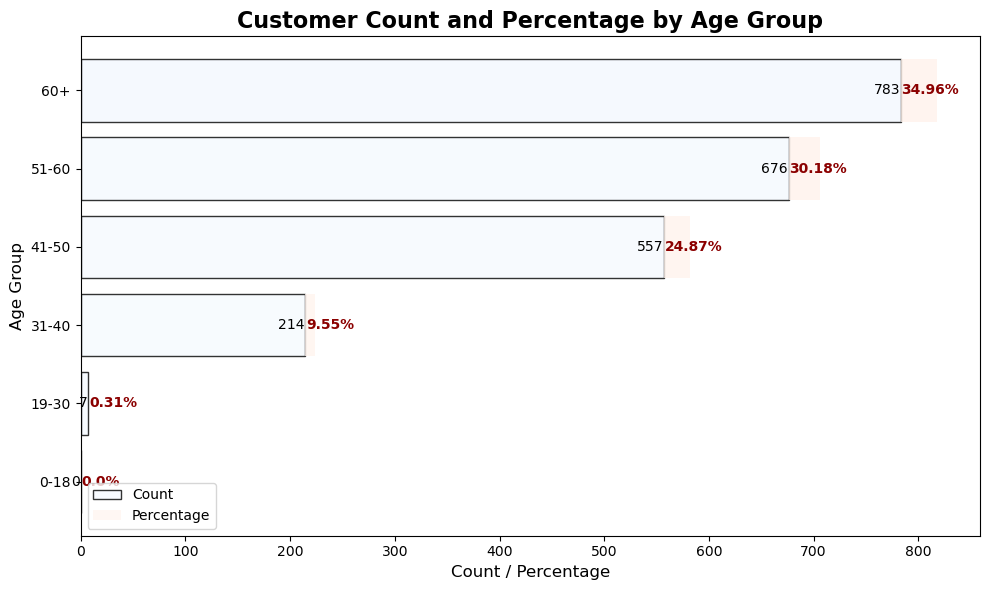

In [14]:
import matplotlib.pyplot as plt

# Calculate the count of customers in each age group
age_group_counts = df_split['Age Group'].value_counts().sort_index()

# Calculate the percentage of customers in each age group
age_group_percentage = (age_group_counts / len(df_split)) * 100
age_group_percentage = age_group_percentage.round(2)

# Create a DataFrame for plotting
age_group_df = pd.DataFrame({
    'Count': age_group_counts,
    'Percentage': age_group_percentage
})

# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create horizontal bars for counts with professional color theme (Blues)
bars = ax.barh(age_group_df.index.astype(str), age_group_df['Count'], 
               color=plt.cm.Blues(range(len(age_group_df))), 
               edgecolor='black', alpha=0.8, label='Count')

# Overlay the percentage values with a different color theme (Reds)
bars_percentage = ax.barh(age_group_df.index.astype(str), age_group_df['Percentage'], 
                          left=age_group_df['Count'], 
                          color=plt.cm.Reds(range(len(age_group_df))), 
                          alpha=0.8, label='Percentage')

# Add labels to each bar
for bar, count, percentage in zip(bars, age_group_df['Count'], age_group_df['Percentage']):
    # Label for count, placed inside the bar (left of the count bar)
    ax.text(bar.get_width() - 0.5, bar.get_y() + bar.get_height() / 2, f"{count}", 
            ha='right', va='center', fontsize=10, color='black')
    
    # Label for percentage, placed after the count bar, bold and in a different color
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f"{percentage}%", 
            ha='left', va='center', fontsize=10, color='darkred', fontweight='bold')

# Set labels and title
plt.title('Customer Count and Percentage by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Count / Percentage', fontsize=12)
plt.ylabel('Age Group', fontsize=12)

# Show legend
plt.legend()

plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


#### Number of children at home
67% of customers have 1 or 2 children at home. 

In [15]:
import pandas as pd

# Calculate the count of customers for Kidhome and Teenhome
kidhome_counts = df_split['Kidhome'].value_counts()
teenhome_counts = df_split['Teenhome'].value_counts()

# Create DataFrames for Kidhome and Teenhome with percentages
kidhome_df = pd.DataFrame({
    'Count': kidhome_counts,
    'Percentage': (kidhome_counts / len(df_split)) * 100
}).reset_index()
kidhome_df.columns = ['Kidhome', 'Count', 'Percentage']
kidhome_df['Percentage'] = kidhome_df['Percentage'].round(2)

teenhome_df = pd.DataFrame({
    'Count': teenhome_counts,
    'Percentage': (teenhome_counts / len(df_split)) * 100
}).reset_index()

teenhome_df.columns = ['Teenhome', 'Count', 'Percentage']
teenhome_df['Percentage'] = teenhome_df['Percentage'].round(2)

# Display the DataFrames
display(kidhome_df, teenhome_df)


,Kidhome,Count,Percentage
0,0,1293,57.72
1,1,899,40.13
2,2,48,2.14


,Teenhome,Count,Percentage
0,0,1158,51.70
1,1,1030,45.98
2,2,52,2.32


In [16]:
import pandas as pd

# Define possible values for Kidhome and Teenhome
kidhome_values = [0, 1, 2]  
teenhome_values = [0, 1, 2] 

# List to store the combinations and customer counts
children = []

# Get the total number of customers
total_customers = len(df_split)

# Loop through all possible combinations of Kidhome and Teenhome
for i in kidhome_values:
    for j in teenhome_values:
        # Filter the DataFrame based on the current values of Kidhome and Teenhome
        d = df_split[(df_split['Kidhome'] == i) & (df_split['Teenhome'] == j)]
        
        # Get the count of customers for this combination
        customer_count = d.shape[0]
        
        # Calculate the percentage
        percentage = (customer_count / total_customers) * 100
        
        # Append the combination, count, and percentage to the list
        children.append({'Kidhome': i, 'Teenhome': j, 'Customer_Count': customer_count, 'Percentage': round(percentage, 2)})

# Convert the list into a DataFrame
children_df = pd.DataFrame(children).sort_values(by='Customer_Count', ascending=False)

# Display the resulting DataFrame
print(children_df)




   Kidhome  Teenhome  Customer_Count  Percentage
0        0         0             638       28.48
1        0         1             625       27.90
3        1         0             503       22.46
4        1         1             374       16.70
7        2         1              31        1.38
2        0         2              30        1.34
5        1         2              22        0.98
6        2         0              17        0.76
8        2         2               0        0.00


In [17]:
27.9+16.7+22.46

67.06

#### Education Level
88.53% of the customer has a bachelor's or higher degree

In [18]:
# Initialize the dictionary with education levels
Education_Level = {edu: 0 for edu in df_split['Education'].unique()}

# Count the number of customers for each education level
for edu in Education_Level.keys():
    Education_Level[edu] = df_split[df_split['Education'] == edu]['Education'].count()

# Convert the dictionary to a DataFrame
Education_Level_df = pd.DataFrame(Education_Level.items(), columns=['Education', 'Count'])

# Sort the DataFrame by count and reset the index
Education_Level_df.sort_values(by='Count', ascending=False, inplace=True)
Education_Level_df.reset_index(drop=True, inplace=True)
Education_Level_df['Percentage'] = Education_Level_df['Count'] / Education_Level_df['Count'].sum() * 100
Education_Level_df['Percentage']=Education_Level_df['Percentage'].round(2)
Education_Level_df

,Education,Count,Percentage
0,Graduation,1127,50.31
1,PhD,486,21.70
2,Master,370,16.52
3,2n Cycle,203,9.06
4,Basic,54,2.41


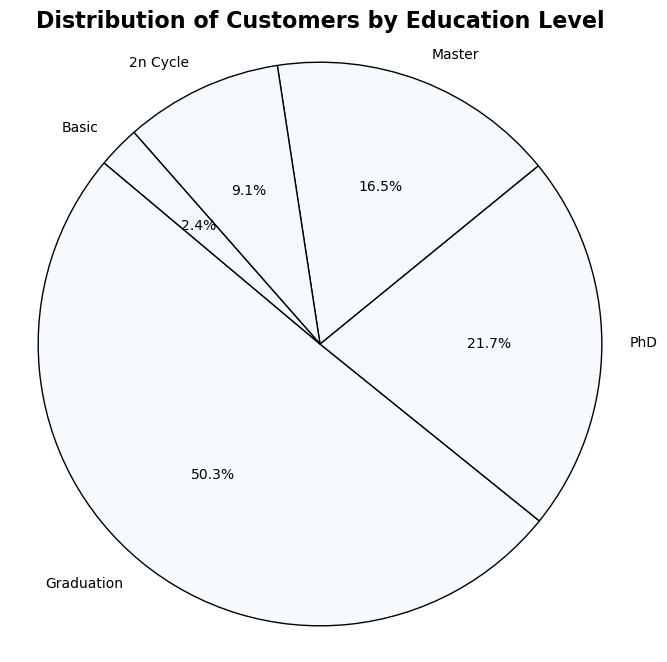

In [19]:
import matplotlib.pyplot as plt

# Pie chart visualization for Education Level percentages
plt.figure(figsize=(8, 8))
plt.pie(Education_Level_df['Percentage'], 
        labels=Education_Level_df['Education'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Blues(range(len(Education_Level_df))),  # Use Blues gradient for colors
        wedgeprops={'edgecolor': 'black'})  # Add black border around wedges

# Add a title
plt.title('Distribution of Customers by Education Level', fontsize=16, fontweight='bold')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#### Income Level
66.8% of the customer earns more than 40K annually

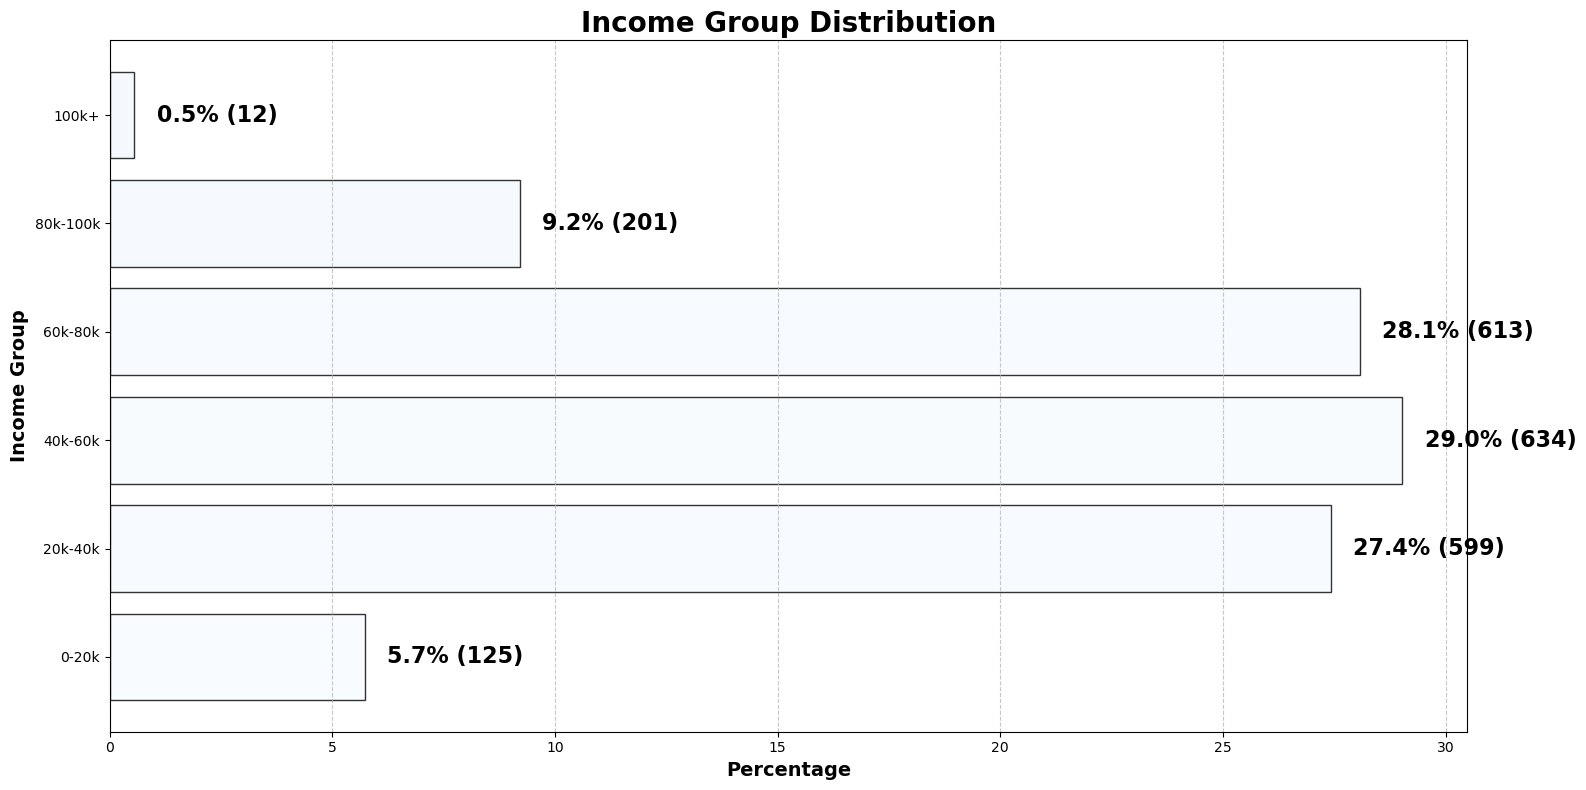

In [20]:
import matplotlib.pyplot as plt

# Define income bins and labels
bins = [0, 20000, 40000, 60000, 80000, 100000, df_split['Income'].max()]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']

# Create a new column for income groups
df_split['Income Group'] = pd.cut(df_split['Income'], bins=bins, labels=labels, right=False)

# Count the number of customers in each income group
income_group_counts = df_split['Income Group'].value_counts().sort_index()

# Calculate percentages
income_group_percentages = (income_group_counts / income_group_counts.sum()) * 100

# Create a horizontal bar chart
plt.figure(figsize=(16, 8))
bars = plt.barh(
    income_group_counts.index, 
    income_group_percentages, 
    color=plt.cm.Blues(range(len(income_group_counts))),  # Use gradient colors
    edgecolor='black', 
    alpha=0.8
)

# Add labels for percentage and count on the bars
for bar, percentage, count in zip(bars, income_group_percentages, income_group_counts):
    plt.text(
        bar.get_width() + 0.5,  # Offset the text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically
        f'{percentage:.1f}% ({count})',  # Format as "XX.X% (Count)"
        va='center', 
        fontsize=16,
        fontweight='bold',  # Make the text bold
        color='black'  # Set text color to black for visibility
    )

# Customize the chart
plt.title('Income Group Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Percentage', fontsize=14, fontweight='bold')
plt.ylabel('Income Group', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for x-axis
plt.tight_layout()  # Adjust layout to avoid clipping

# Show the chart
plt.show()


In [21]:
0.5+9.2+28.1+29

66.8

#### Marital Status
66.46% Customers are not single

In [22]:
import pandas as pd

# Initialize the dictionary with marital statuses
Marital_Status_Level = {status: 0 for status in df_split['Marital_Status'].unique()}

# Count the number of customers for each marital status
for status in Marital_Status_Level.keys():
    Marital_Status_Level[status] = df_split[df_split['Marital_Status'] == status]['Marital_Status'].count()

# Convert the dictionary to a DataFrame
Marital_Status_Level_df = pd.DataFrame(Marital_Status_Level.items(), columns=['Marital Status', 'Count'])

# Sort the DataFrame by count and reset the index
Marital_Status_Level_df.sort_values(by='Count', ascending=False, inplace=True)
Marital_Status_Level_df.reset_index(drop=True, inplace=True)

Marital_Status_Level_df['Percentage'] = (Marital_Status_Level_df['Count'] / Marital_Status_Level_df['Count'].sum()) * 100
Marital_Status_Level_df['Percentage'] = Marital_Status_Level_df['Percentage'].round(2)
Marital_Status_Level_df


,Marital Status,Count,Percentage
0,Married,864,38.57
1,Together,580,25.89
2,Single,480,21.43
3,Divorced,232,10.36
4,Widow,77,3.44
5,Alone,3,0.13
6,Absurd,2,0.09
7,YOLO,2,0.09


In [23]:
38.57+25.89

64.46000000000001

### Step 4: My initial assumptions

Based on the findings thus far, the customer base can be segmented as follows:

**Age Group**  
- 85% of customers are over 40 years old, with no customers under the age of 18.

**Number of Children at Home**  
- 67% of customers have 1 or 2 children living at home.

**Education Level**  
- 88.53% of customers hold a bachelor’s degree or higher.

**Income Level**  
- 66.8% of customers earn more than $40,000 annually.

**Marital Status**  
- 66.46% of customers are not single.

---

<span style="color:green">**Proposed Customer Segments:**</span>

1. <span style="color:green">**Older, High-Income Families**</span>  
2. <span style="color:green">**Educated, High-Income Singles**</span>


### Step 5: Assumption Testing via K-Means Clustering

In [24]:
df_split.pop('Dt_Customer')

df_split.dropna(inplace=True)

df_split.isnull().sum() #checking for null values


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Age Group              0
Income Group           0
dtype: int64

In [25]:
df_split.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Age Group', 'Income Group'],
      dtype='object')

In [26]:
%pip install scikit-learn

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecting relevant features
features = [ 'Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
X = df_split[features]

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(df_split[['Education', 'Marital_Status']], drop_first=True)

# Combine the numerical and categorical features
X = pd.concat([X, df_encoded], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means clustering (Let's assume we want to test for 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
df_split['Cluster'] = kmeans.fit_predict(X_scaled)


Note: you may need to restart the kernel to use updated packages.


     ID  Cluster
0  5524        2
1  2174        1
2  4141        0
3  6182        1
4  5324        0
5  7446        0
6   965        0
7  6177        1
8  4855        1
9  5899        1


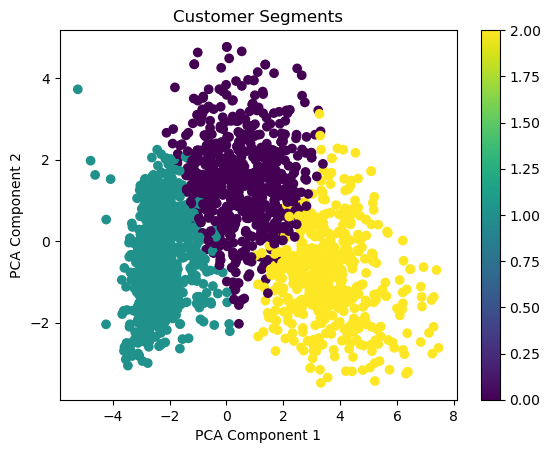

In [27]:
# Checking the clustered data
print(df_split[['ID', 'Cluster']].head(10))

# Visualizing the clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_split['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [28]:
df_split.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Age Group', 'Income Group', 'Cluster'],
      dtype='object')

Note: you may need to restart the kernel to use updated packages.


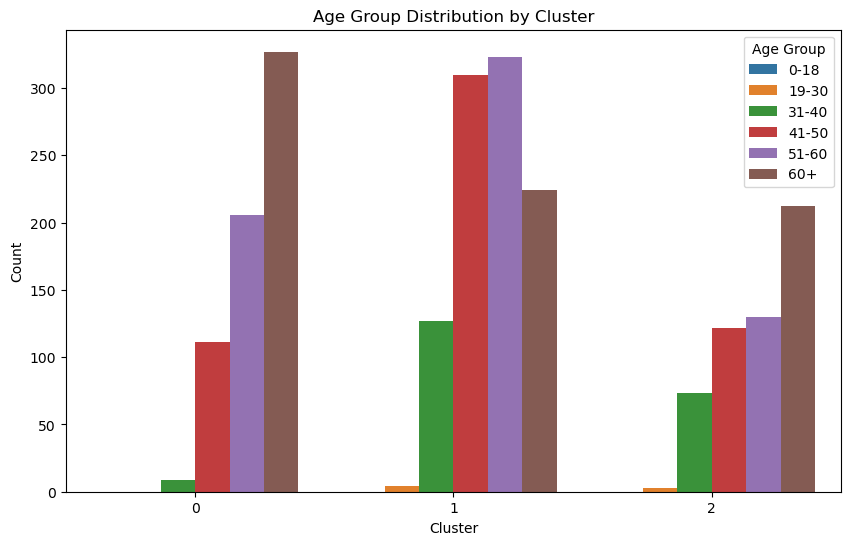

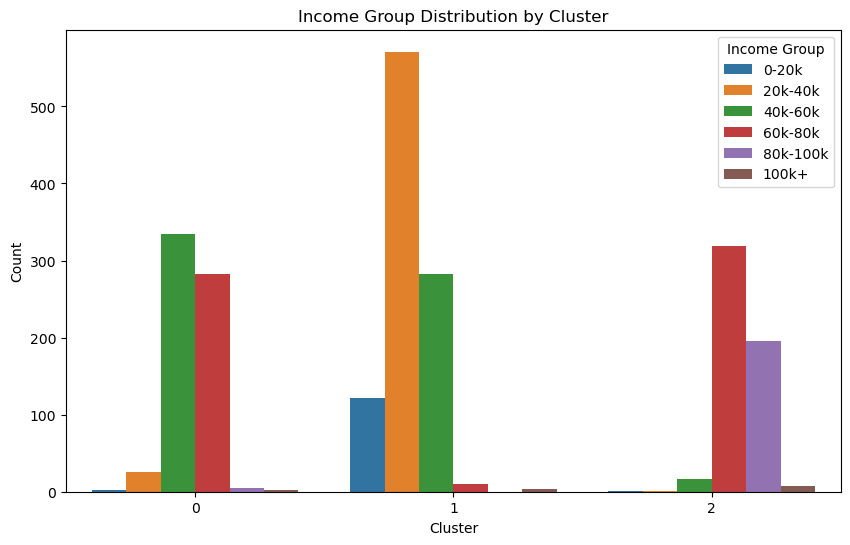

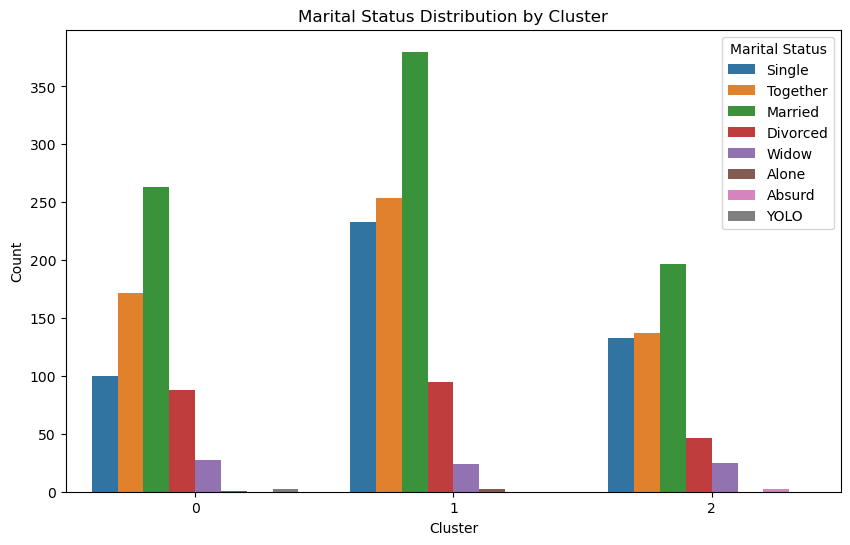

In [29]:
%pip install seaborn
import seaborn as sns

# Age Group Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df_split, x='Cluster', hue='Age Group')
plt.title('Age Group Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

# Income Group Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df_split, x='Cluster', hue='Income Group')
plt.title('Income Group Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Income Group')
plt.show()

# Marital Status Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df_split, x='Cluster', hue='Marital_Status')
plt.title('Marital Status Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()




In [30]:
sorted_clusters = df_split['Cluster'].unique()
sorted_clusters.sort()

for i in sorted_clusters:
    age_group_counts = df_split[df_split['Cluster'] == i]['Age Group'].value_counts(normalize=True)
    age_group_counts=age_group_counts.round(2)
    print(f"Cluster {i} Age Group Proportions:\n{age_group_counts}\n")

    income_group_counts = df_split[df_split['Cluster'] == i]['Income Group'].value_counts(normalize=True)
    income_group_counts=income_group_counts.round(2) 
    print(f"Cluster {i} Income Group Proportions:\n{income_group_counts}\n")

    marital_status_counts = df_split[df_split['Cluster'] == i]['Marital_Status'].value_counts(normalize=True)
    marital_status_counts=marital_status_counts.round(2) 
    print(f"Cluster {i} Marital Status Proportions:\n{marital_status_counts}\n")

    Education_Level_counts = df_split[df_split['Cluster'] == i]['Education'].value_counts(normalize=True)
    Education_Level_counts=Education_Level_counts.round(2) 
    print(f"Cluster {i} Education Level Proportions:\n{Education_Level_counts}\n")

Cluster 0 Age Group Proportions:
Age Group
60+      0.50
51-60    0.32
41-50    0.17
31-40    0.01
0-18     0.00
19-30    0.00
Name: proportion, dtype: float64

Cluster 0 Income Group Proportions:
Income Group
40k-60k     0.51
60k-80k     0.43
20k-40k     0.04
80k-100k    0.01
0-20k       0.00
100k+       0.00
Name: proportion, dtype: float64

Cluster 0 Marital Status Proportions:
Marital_Status
Married     0.40
Together    0.26
Single      0.15
Divorced    0.13
Widow       0.04
YOLO        0.00
Alone       0.00
Name: proportion, dtype: float64

Cluster 0 Education Level Proportions:
Education
Graduation    0.45
PhD           0.29
Master        0.20
2n Cycle      0.06
Basic         0.00
Name: proportion, dtype: float64

Cluster 1 Age Group Proportions:
Age Group
51-60    0.33
41-50    0.31
60+      0.23
31-40    0.13
19-30    0.00
0-18     0.00
Name: proportion, dtype: float64

Cluster 1 Income Group Proportions:
Income Group
20k-40k     0.58
40k-60k     0.29
0-20k       0.12
60k-80k  

In [32]:
import pandas as pd

# Replace 'df_split' with the actual DataFrame you're using
cluster_counts = df_split['Cluster'].value_counts()

# Create a DataFrame with counts and percentages
cluster_df = pd.DataFrame({
    'Count': cluster_counts,
    'Percentage': (cluster_counts / cluster_counts.sum() * 100).round(2)
}).reset_index()

# Rename the columns
cluster_df.columns = ['Cluster', 'Count', 'Percentage']

cluster_df


,Cluster,Count,Percentage
0,1,988,45.30
1,0,653,29.94
2,2,540,24.76


## Key Insights for Each Cluster

### **Cluster 0 (45.30%): Older, Mid-Income Families**

**Key Characteristics:**
- **Age Group:** Predominantly older customers, with 50% over 60 years old, followed by 32% between 51-60 years.
- **Income Group:** The majority (51%) earn between **40k-60k**, with 43% earning **60k-80k**. A small percentage earn below 40k.
- **Marital Status:** Primarily **married** (40%) and **living together** (26%). A significant portion (15%) are **single**, with a smaller number being **divorced** (13%).
- **Education Level:** A notable proportion have **Graduation** (45%) or **PhD** (29%), indicating a highly educated group.

**Summary:**
This cluster likely represents older, family-oriented individuals with mid-to-high income levels and a higher education background. They are more likely to be in stable relationships, possibly married or living together.

---

### **Cluster 1 (29.94%): Middle-Aged, Lower-Middle Income, Educated Individuals**

**Key Characteristics:**
- **Age Group:** Customers in the **51-60** age group (33%) and **41-50** age group (31%) are the most common.
- **Income Group:** The dominant income group is **20k-40k** (58%), followed by **40k-60k** (29%). A small percentage earn over 60k.
- **Marital Status:** Most individuals are **married** (38%) or **living together** (26%), with a substantial portion being **single** (24%).
- **Education Level:** A significant portion has **Graduation** (50%) as the highest education level, while a smaller percentage have **Master's** (16%) and **PhD** (18%).

**Summary:**
This cluster includes middle-aged individuals with lower-to-middle income levels. Many have attained a graduation-level education and tend to be married or living with a partner. This group might include individuals in stable but modest income households, possibly with family obligations.

---

### **Cluster 2 (24.76%): Affluent, Highly Educated Older Individuals**

**Key Characteristics:**
- **Age Group:** Customers in the **60+** age group (39%) dominate, followed by those in the **51-60** (24%) and **41-50** (23%) age groups.
- **Income Group:** The majority of customers in this cluster earn in the **60k-80k** range (59%), with **36%** earning **80k-100k**. Very few earn below 40k.
- **Marital Status:** Primarily **married** (36%) or **living together** (25%), with some **single** individuals (25%) as well.
- **Education Level:** The majority are highly educated, with **58%** holding a **Graduation** degree and **19%** having a **PhD**.

**Summary:**
This cluster likely represents affluent, older individuals with a high level of education, primarily holding **Graduation** and **PhD** degrees. They tend to be well-off financially, with a significant proportion earning between **60k-100k** annually. They are more likely to be married or in relationships.



# Step 6: Next Steps

With the clusters we've created, we can:

<br>1. Forecast how new customers will spend on different products by averaging the spending patterns of the cluster they belong to.
<br>2. Predict how likely new customers are to engage with campaigns based on the campaign responses of their cluster.
<br>3. Forecast how new customers will interact with different purchase channels by analyzing the historical behavior of their assigned cluster.

# Graveyard

In [62]:
# Select the relevant columns
df_Marital_Status = df_split[['Marital_Status', 'Age', 'Recency', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']]

# Define the columns for which you want to calculate the median
median_columns = ['Age', 'Recency', 'Income', 'Kidhome', 'Teenhome']

# Define the columns to aggregate (sum for these columns)
aggregate_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                     'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                     'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Create the grouped DataFrame
df_grouped = df_Marital_Status.groupby('Marital_Status').agg(
    {**{col: 'median' for col in median_columns},  # Median for selected columns
     **{col: 'sum' for col in aggregate_columns}}  # Sum for selected columns
).reset_index()

df_grouped.pop('Age')
# Display the grouped DataFrame
df_grouped


,Marital_Status,Recency,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,Absurd,53.0,72365.5,0.0,0.0,711,169,625,411,61,408,4,7,15,13,3,0,0,1,1,0,0
1,Alone,37.0,35860.0,1.0,1.0,554,12,79,23,21,81,11,15,2,12,19,1,0,0,0,0,0
2,Divorced,51.0,52683.0,0.0,1.0,75364,6363,34848,8130,6222,10739,565,1000,620,1350,1273,20,18,13,12,5,2
3,Married,48.0,51876.0,0.0,0.0,258751,22235,138829,30569,23070,36999,2067,3532,2268,5055,4635,63,63,66,63,7,8
4,Single,51.0,48904.0,0.0,0.0,138399,12881,87412,18344,13086,20990,1023,1859,1248,2707,2536,38,33,31,31,5,6
5,Together,51.0,51369.0,0.0,1.0,177959,14703,97500,22615,15151,24937,1348,2367,1552,3327,3051,37,43,44,32,12,5
6,Widow,48.0,56551.0,0.0,1.0,28434,2548,14575,3957,3004,4371,180,356,256,494,376,4,10,8,5,1,0
7,YOLO,3.0,48432.0,0.0,1.0,644,6,100,8,6,84,10,14,2,12,16,0,0,0,0,0,0


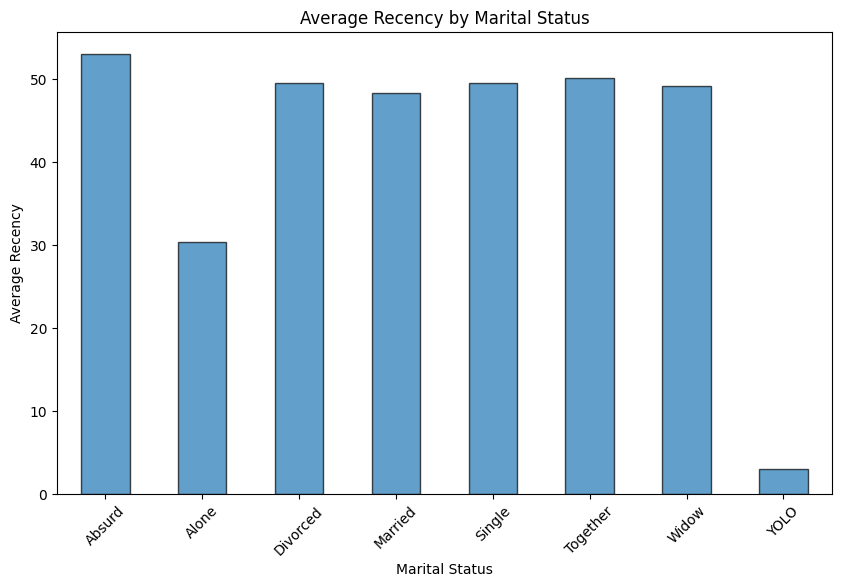

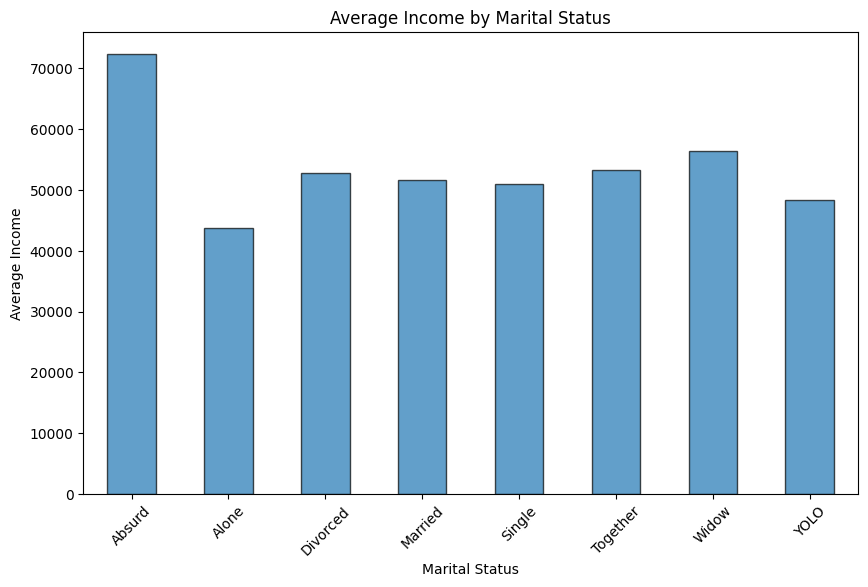

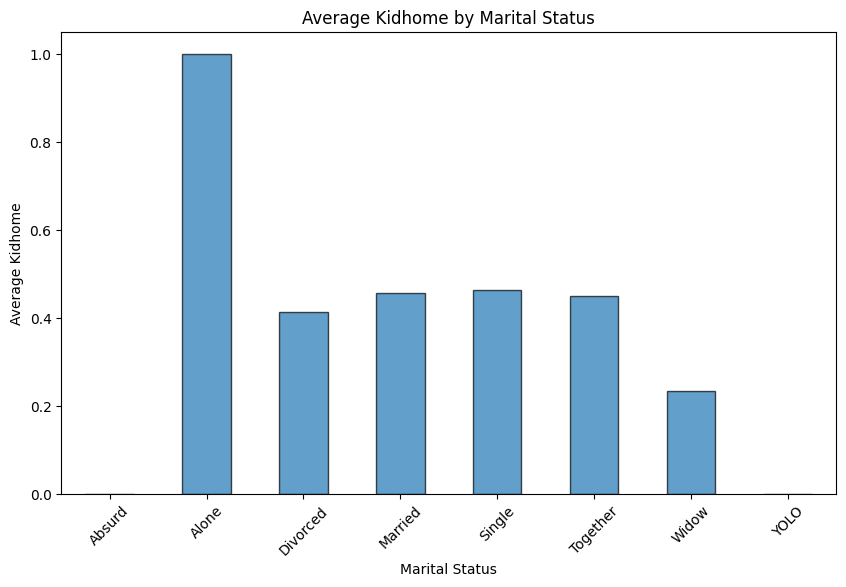

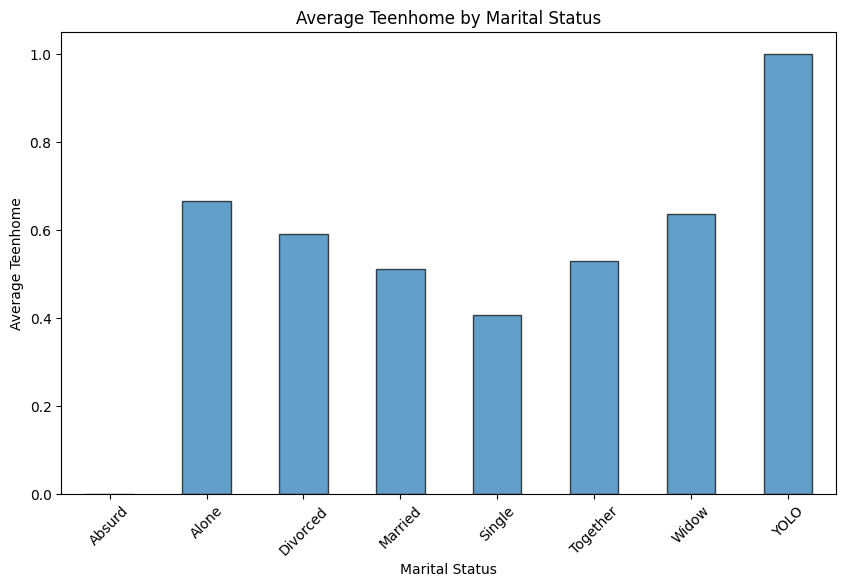

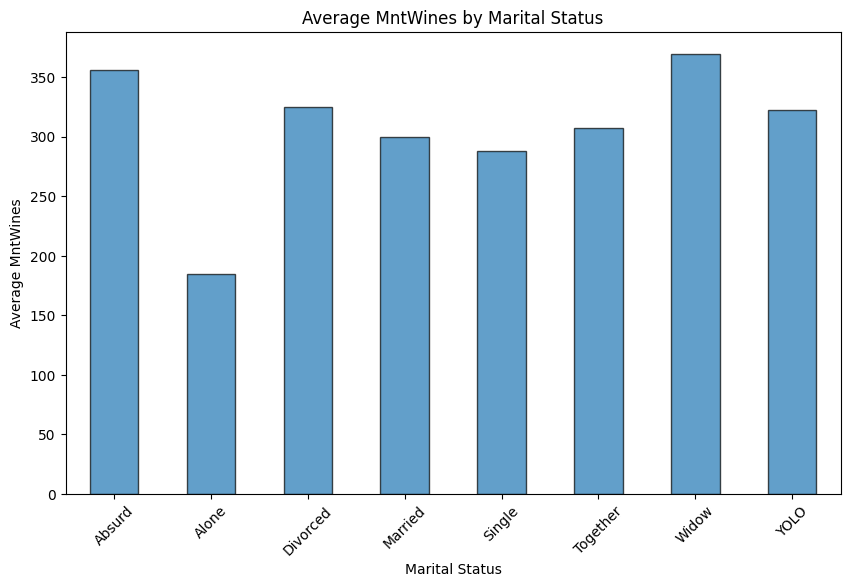

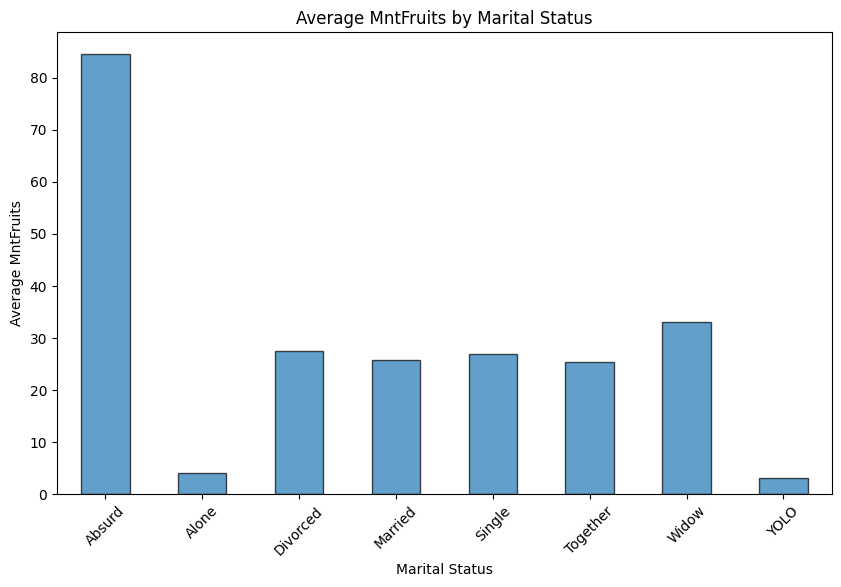

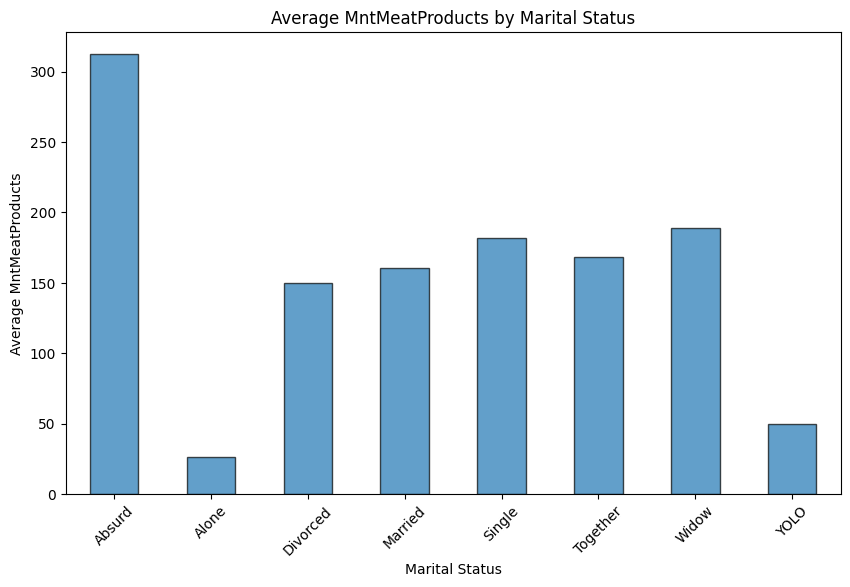

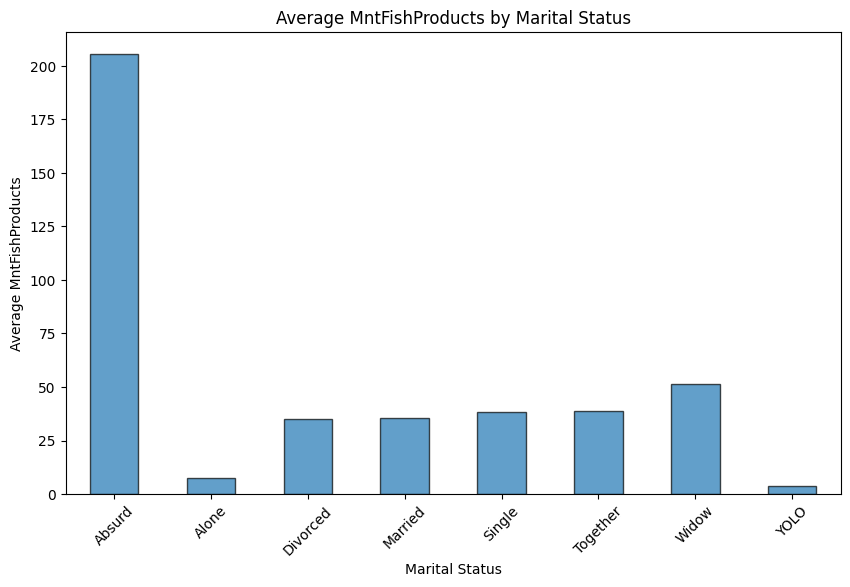

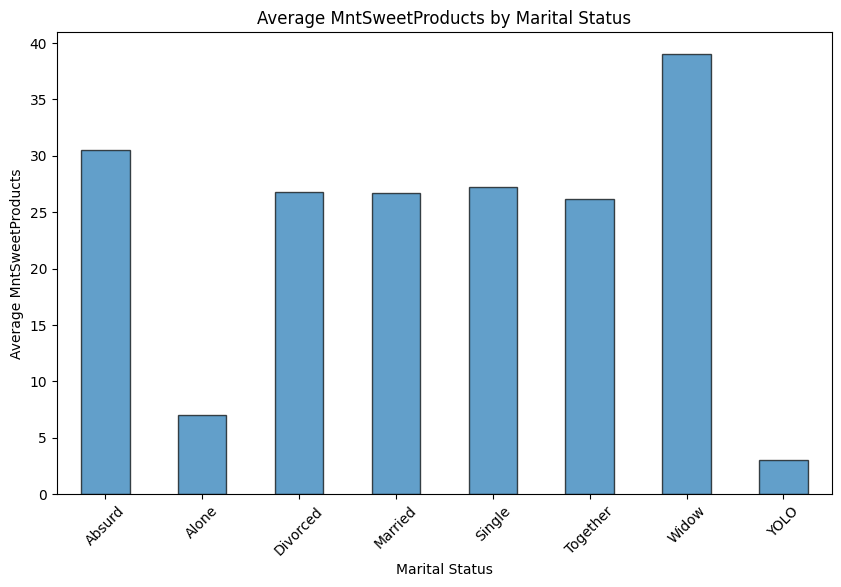

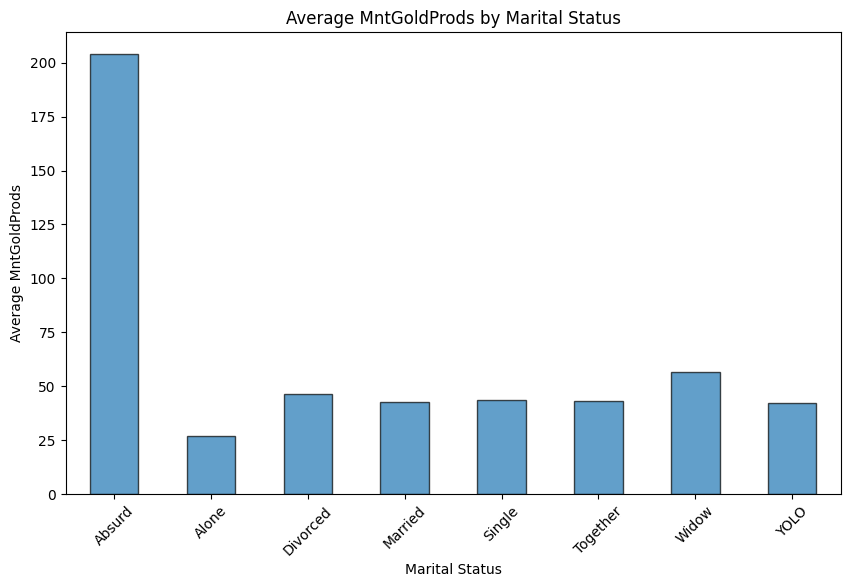

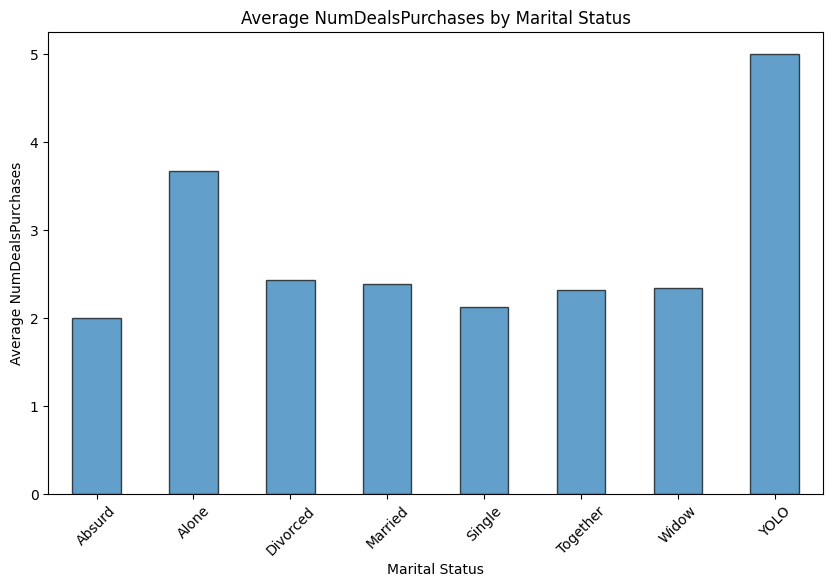

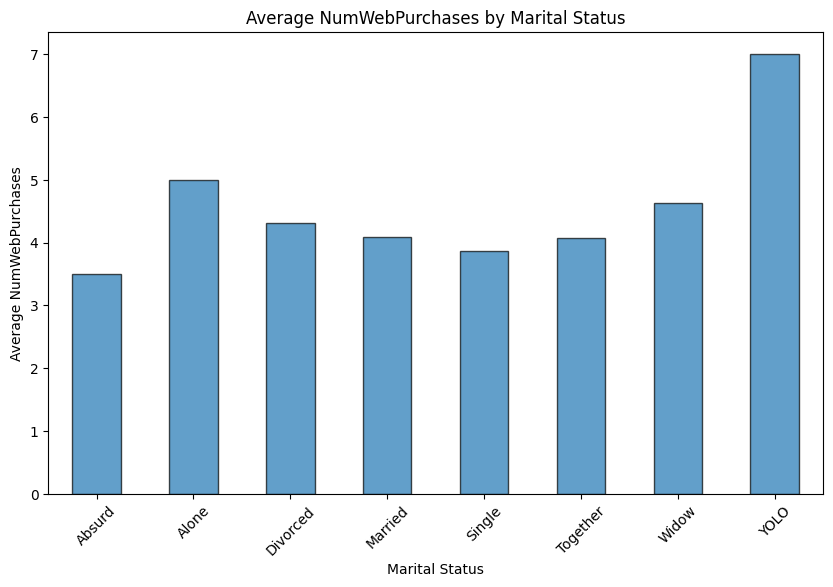

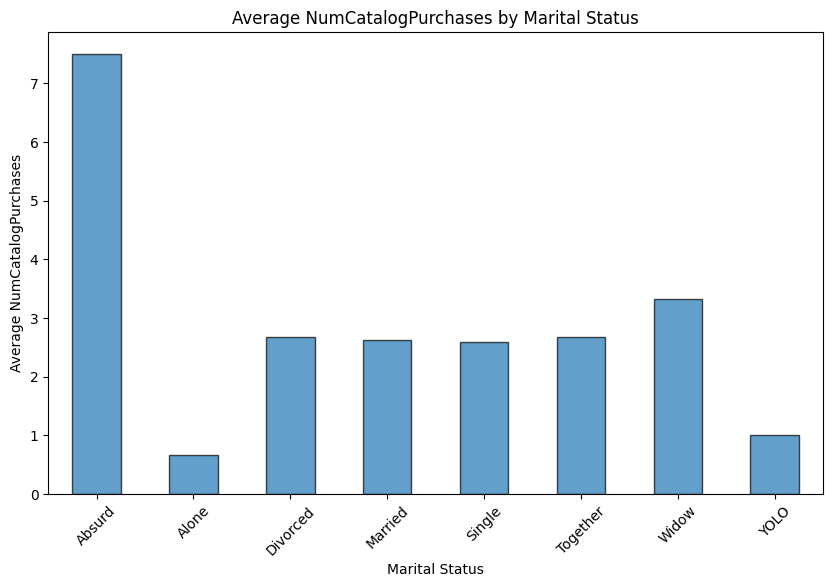

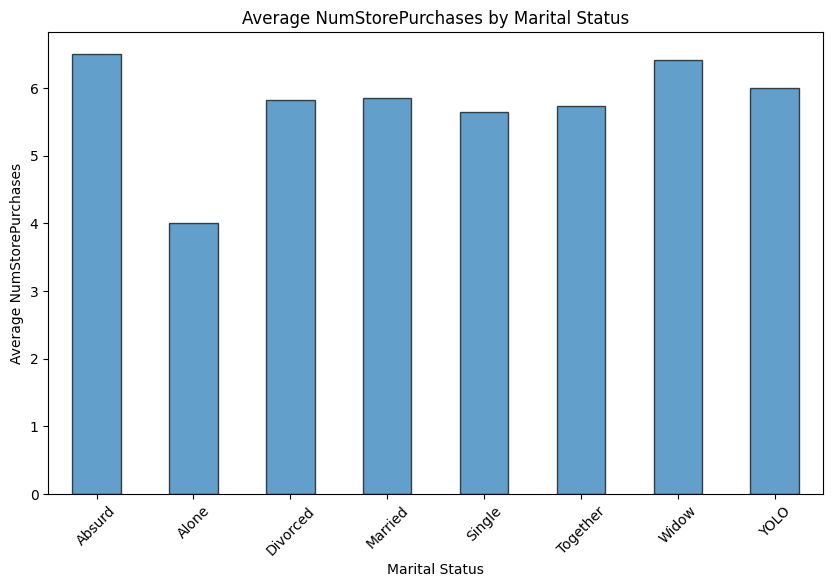

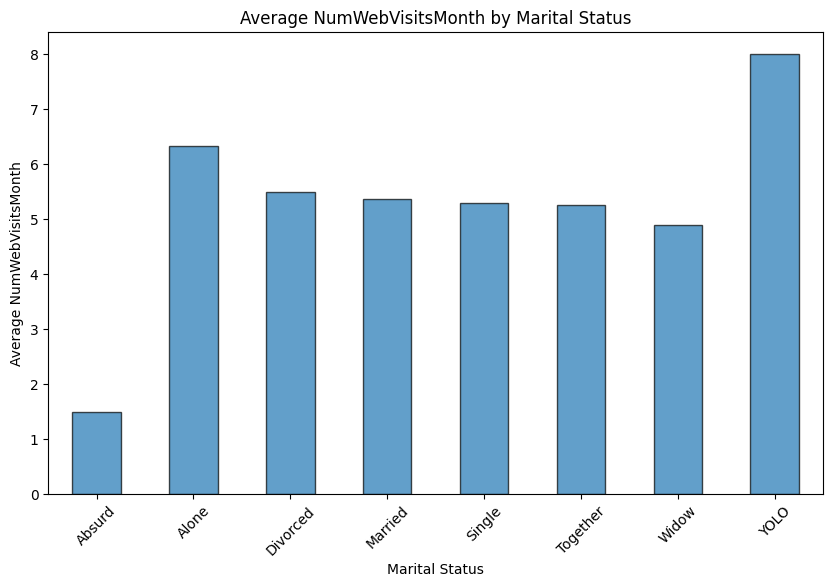

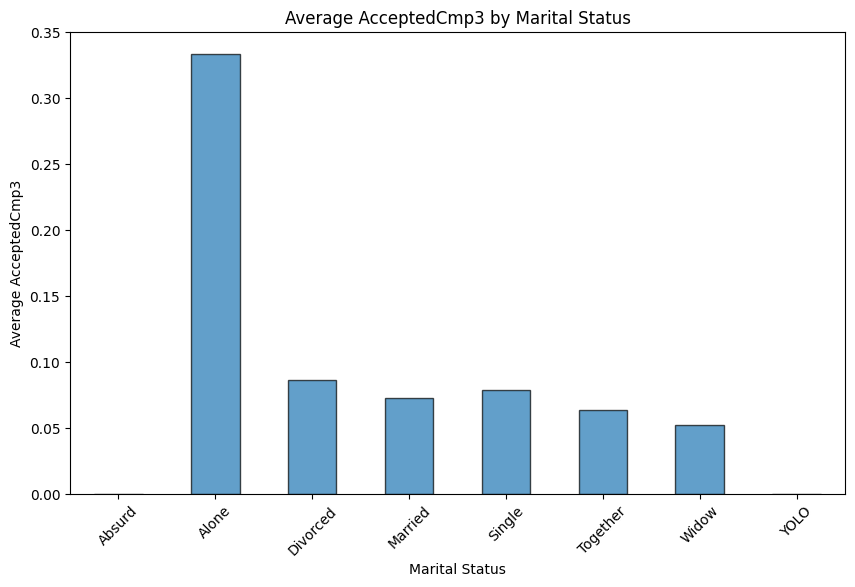

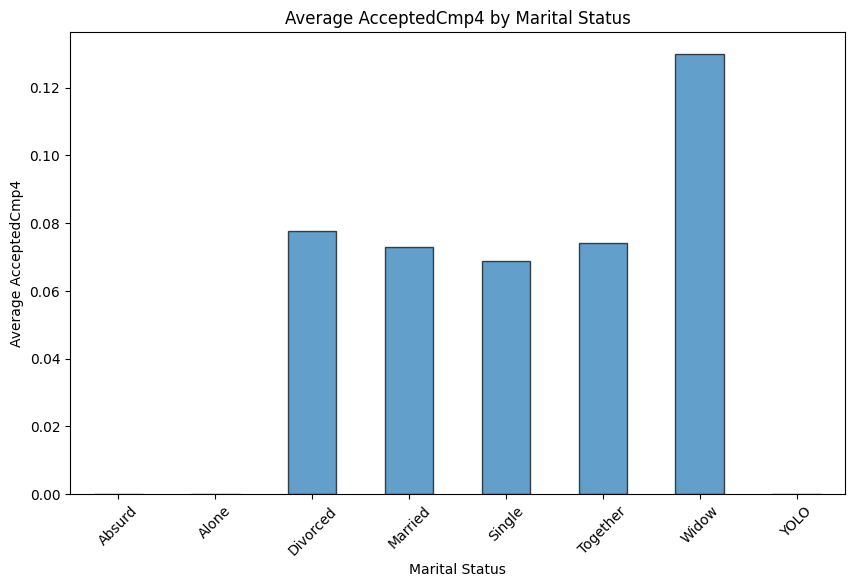

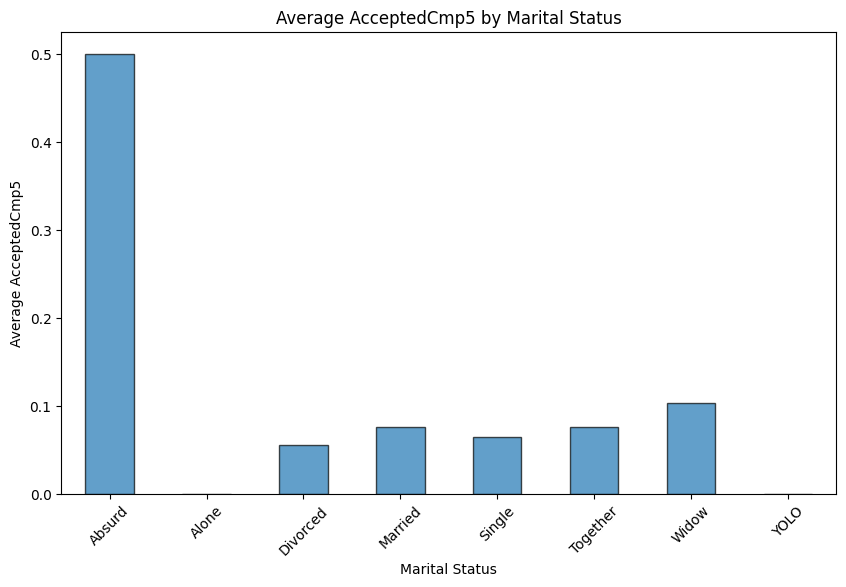

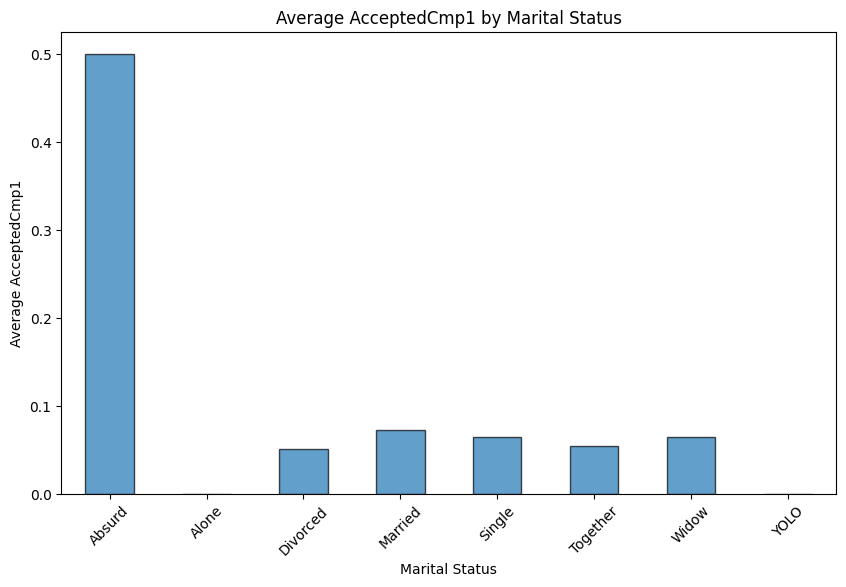

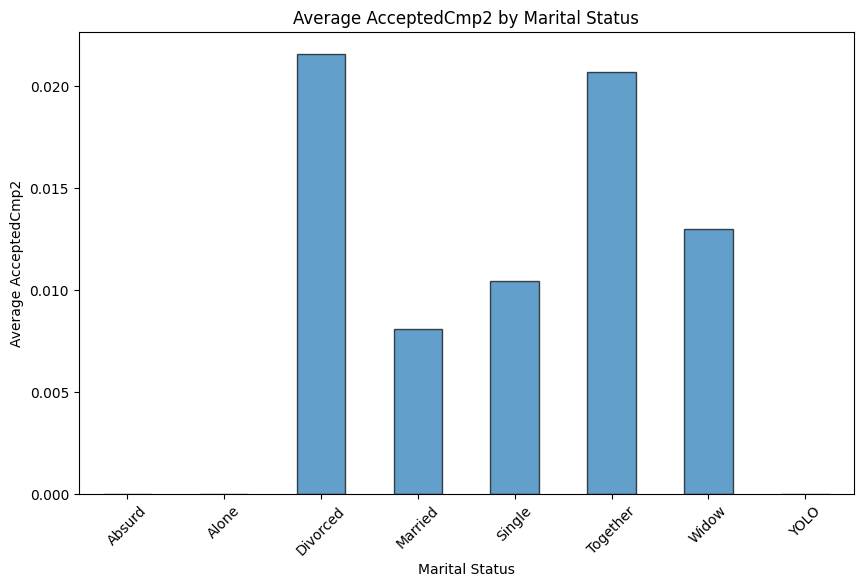

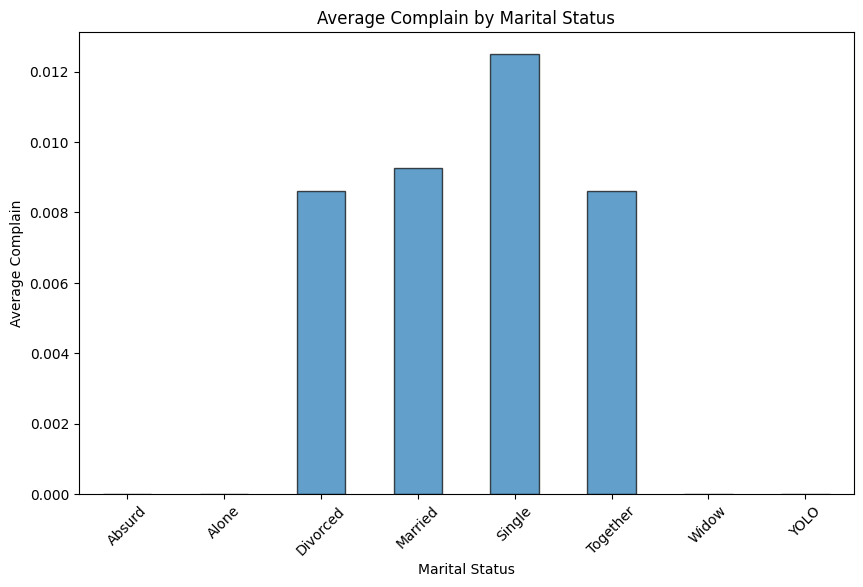

In [63]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['Recency', 'Income', 'Kidhome', 'Teenhome',
                   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                   'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                   'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                   'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Create a plot for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    df_split.groupby('Marital_Status')[column].mean().plot(kind='bar', alpha=0.7, edgecolor='black')
    plt.title(f'Average {column} by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel(f'Average {column}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
df_split.head()

In [ ]:
# Select the relevant columns
df_Age_Group= df_split[['Age Group', 'Recency', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']]

# Define the columns for which you want to calculate the median
median_columns = ['Recency', 'Income', 'Kidhome', 'Teenhome']

# Define the columns to aggregate (sum for these columns)
aggregate_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                     'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                     'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Create the grouped DataFrame
df_Age = df_Age_Group.groupby('Age Group').agg(
    {**{col: 'median' for col in median_columns},  # Median for selected columns
     **{col: 'sum' for col in aggregate_columns}}  # Sum for selected columns
).reset_index()

# Display the grouped DataFrame
df_Age


In [ ]:
df_Age.columns

In [ ]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['Recency', 'Income', 'Kidhome', 'Teenhome', 'MntWines',
                   'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                   'AcceptedCmp2', 'Complain']

# Group the data by 'Age Group' and calculate the mean for each column
df_age_grouped = df_Age.groupby('Age Group')[columns_to_plot].mean()

# Create a plot for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    ax = df_age_grouped[column].plot(kind='bar', alpha=0.7, edgecolor='black')
    
    # Add the count of each bar on top
    for i, v in enumerate(df_age_grouped[column]):
        ax.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
    
    plt.title(f'{column} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel(f'{column}')
    plt.xticks(rotation=45)
    plt.show()
